In [7]:
import qrcode
from PIL import Image, ImageDraw, ImageFont

# choose your font
font = ImageFont.truetype("/usr/share/fonts/TTF/Hack-Regular.ttf", 16, encoding="unic")

# and how many QR codes you need
n_racks = 10
content = ['Rack%03d' % i for i in range(1, n_racks+1)]

# distance in pixels between QR codes
span = 20

In [28]:
def make_qr (text):
    # Create qr code instance
    qr = qrcode.QRCode(version=1, error_correction=qrcode.constants.ERROR_CORRECT_H, box_size=4, border=.2)
    #create the first one
    qr.add_data(text)
    qr.make(fit=True)

    # Create an image from the QR Code instance
    qr_img = qr.make_image(fill_color='black', back_color='white')
    qr_width, qr_height = qr_img.size
    
    canvas = Image.new(mode='RGBA', size=(qr_width, qr_height + 20), color='white')    
                       
    # Create an image for the text label
    t = ImageDraw.Draw(canvas)
    
    # calculate text width so that we can center it under the QR code
    text_width = font.getsize(text)[0]
    t.text(((qr_width - text_width)/2 , qr_height+5), text, fill=(0,0,0,255), font=font)
                       
    canvas.paste(qr_img, (0,0))
    return canvas
    


In [29]:
# create all the images one by one
single_images = [make_qr(text) for text in content]


In [30]:
# Merge them all in one single image
qr_width, qr_height = single_images[0].size
strip = Image.new(mode='RGB', size=((qr_width + span) * (n_racks) - span, qr_height+span), color='white')

for n, image in enumerate(single_images):
    position = (n)*(qr_width+span)
    strip.paste(image, (position, 0))
    
strip.save('adriano_qr_codes.png')

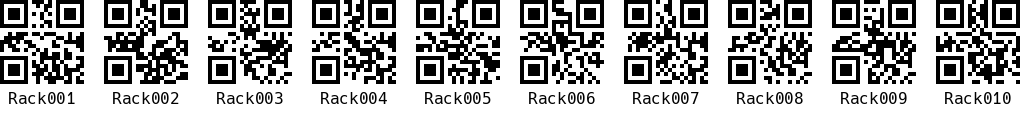

In [31]:
strip